### Visualisation of outlier classification

In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
%store -r  X_test_labeled_df

In [3]:
save_plots = True

In [4]:
X_test_labeled_df.head()

,Analysis,Zr90,Ba137,Sr88,Ge72,Cr52,S33,U238,Al27,B11,Mg24,Nd146,Sc45,K39,Pr141,Li7,inlierLabel
0,06_DH1_1,1.43,5.95,2.00,1.37,5.18,806.55,0.250083,635.240000,93.21,27.83,0.34,1.08,443.100000,0.07,2.79,1
1,07_DH1_2,1.47,7.51,1.84,1.93,5.43,807.55,0.250083,639.090000,95.19,27.99,0.24,1.09,442.100000,0.06,2.37,-1
2,08_DH1_3,1.16,4.40,1.93,2.14,2.61,837.73,0.250083,670.480000,93.63,26.43,0.08,1.17,444.280000,0.03,2.46,-1
3,09_DH2_1,1.45,12.48,4.29,1.59,2.87,750.62,0.080000,1515.220000,63.80,31.98,0.25,1.19,369.135675,0.06,18.47,1
4,10_DH2_2,1.99,14.40,4.44,0.81,5.92,796.21,0.090000,710.920579,60.96,44.95,0.51,1.22,369.135675,0.12,19.98,1


## data preproccessing for dimensionality reduction and visualisation

In [5]:
element_data = X_test_labeled_df[X_test_labeled_df.columns.values[1:-1]]
element_data.head()

,Zr90,Ba137,Sr88,Ge72,Cr52,S33,U238,Al27,B11,Mg24,Nd146,Sc45,K39,Pr141,Li7
0,1.43,5.95,2.00,1.37,5.18,806.55,0.250083,635.240000,93.21,27.83,0.34,1.08,443.100000,0.07,2.79
1,1.47,7.51,1.84,1.93,5.43,807.55,0.250083,639.090000,95.19,27.99,0.24,1.09,442.100000,0.06,2.37
2,1.16,4.40,1.93,2.14,2.61,837.73,0.250083,670.480000,93.63,26.43,0.08,1.17,444.280000,0.03,2.46
3,1.45,12.48,4.29,1.59,2.87,750.62,0.080000,1515.220000,63.80,31.98,0.25,1.19,369.135675,0.06,18.47
4,1.99,14.40,4.44,0.81,5.92,796.21,0.090000,710.920579,60.96,44.95,0.51,1.22,369.135675,0.12,19.98


### features are standardised

In [6]:
my_scaler_train = StandardScaler()


In [7]:
element_data_scaled = my_scaler_train.fit_transform(element_data)


### T-Distributed Stochastic Neighbour Embedding is done 

In [8]:
my_tsne = TSNE(n_components=2, n_iter=5000, verbose=3).fit_transform(element_data_scaled)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 363 samples in 0.001s...
[t-SNE] Computed neighbors for 363 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 363 / 363
[t-SNE] Mean sigma: 1.552641
[t-SNE] Computed conditional probabilities in 0.087s
[t-SNE] Iteration 50: error = 66.0663452, gradient norm = 0.5137837 (50 iterations in 0.687s)
[t-SNE] Iteration 100: error = 66.0800552, gradient norm = 0.5113920 (50 iterations in 0.425s)
[t-SNE] Iteration 150: error = 66.0594788, gradient norm = 0.5309543 (50 iterations in 0.395s)
[t-SNE] Iteration 200: error = 67.4414139, gradient norm = 0.5003165 (50 iterations in 0.551s)
[t-SNE] Iteration 250: error = 66.3410416, gradient norm = 0.5212080 (50 iterations in 0.573s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.341042
[t-SNE] Iteration 300: error = 0.9695935, gradient norm = 0.0039144 (50 iterations in 0.218s)
[t-SNE] Iteration 350: error = 0.8990942, gradient norm = 0.0016507 (

### the t-SNE dimensions are put into a dataframe

In [9]:
tsne_df = pd.DataFrame(data = my_tsne, columns = ['tsne1', 'tsne2'])


### datasets are stored for the purpose of two-dimensional visualisations

In [10]:
tsne_data_with_colour = pd.concat([tsne_df, X_test_labeled_df['inlierLabel']], axis = 1)



In [11]:
tsne_data_with_colour.head()

,tsne1,tsne2,inlierLabel
0,-8.287100,-3.327619,1
1,-8.637551,-3.894378,-1
2,-9.214499,-4.432769,-1
3,-25.218588,-10.045152,1
4,-27.045334,-7.151527,1


### visualise t-SNE in two dimensions


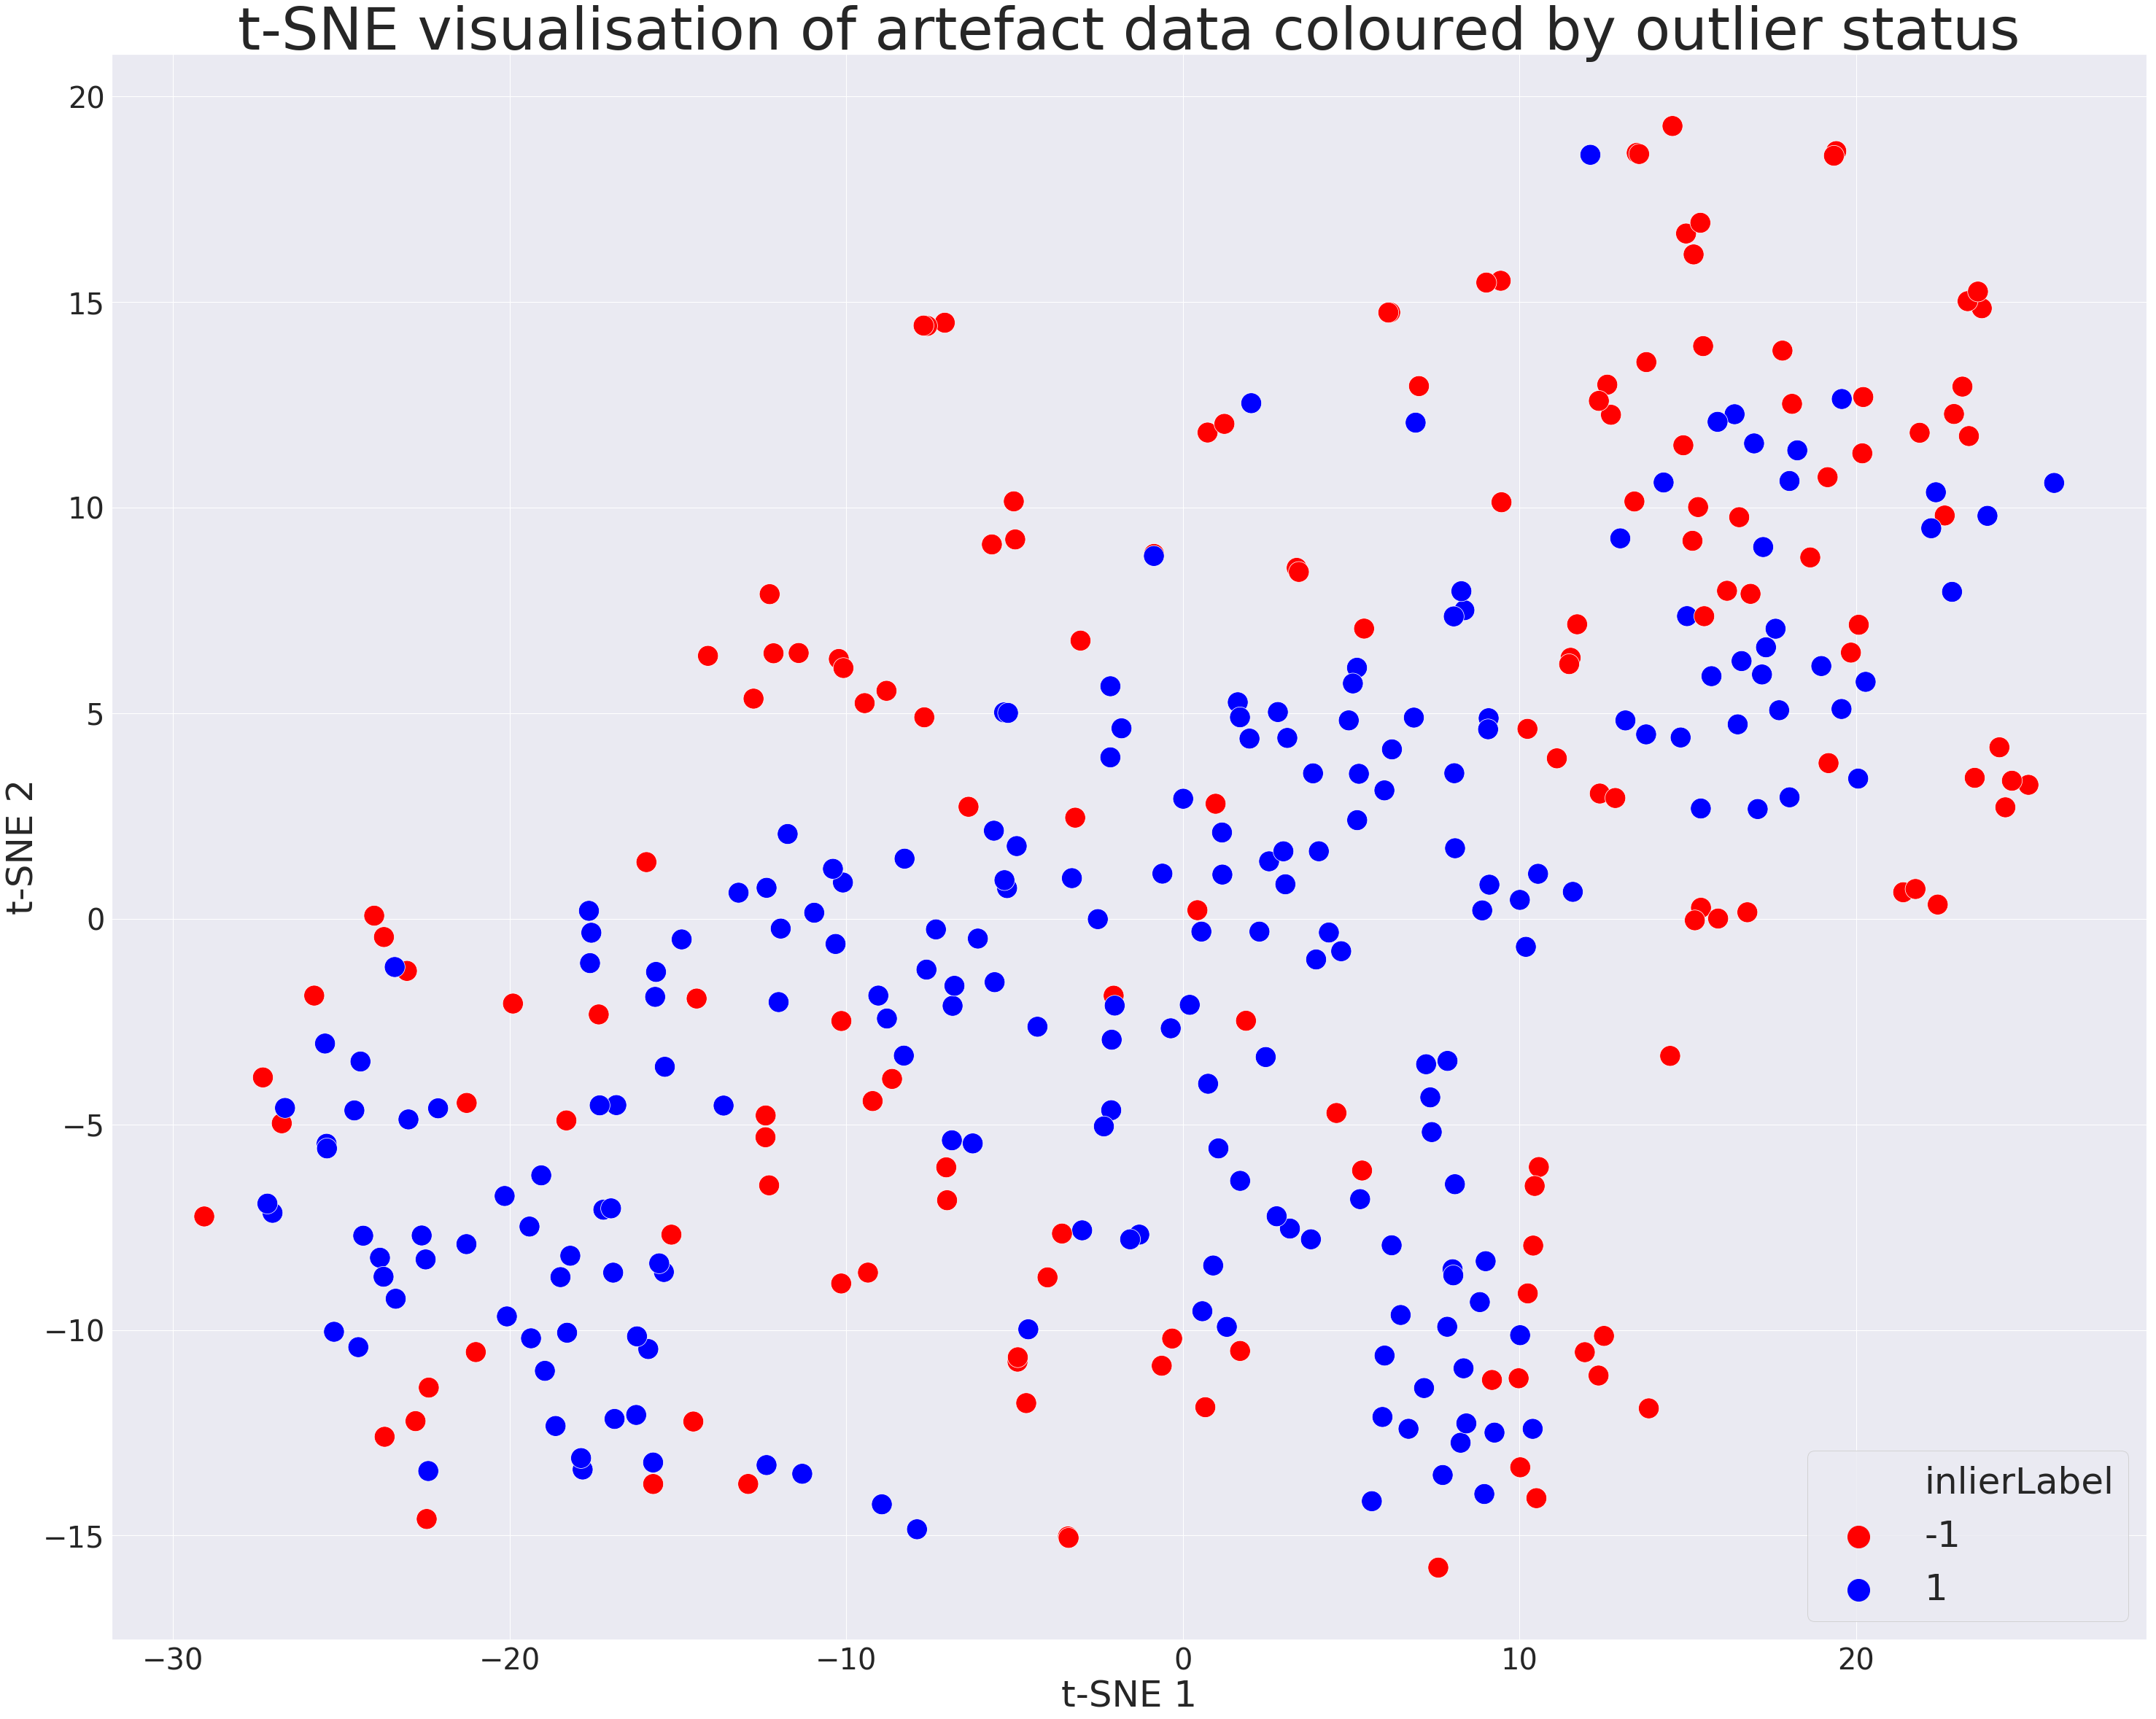

In [12]:
sns.set(rc={'figure.figsize':(50,40)})
plot = sns.scatterplot(data = tsne_data_with_colour, x = 'tsne1', y = 'tsne2', hue='inlierLabel', s = 800, palette = ['red', 'blue'])
plt.title('test', fontsize=70)
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.set_ylabel("t-SNE 2",fontsize=50)
plot.set_xlabel("t-SNE 1",fontsize=50)
plot.tick_params(labelsize=40)
plot.set_title('t-SNE visualisation of artefact data coloured by outlier status', fontdict = {'fontsize': 80})

plt.legend(fontsize = 50, loc = 4, markerscale = 5)

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='figures/tSNE_outlier_detection')

In [13]:
tsne_data_with_colour.to_csv('output_datasets/tsne_outlier_data.csv')